In [4]:
import yfinance as yf
import pandas as pd

tesla_data = yf.download('TSLA', start='2010-01-01', end='2023-12-31', auto_adjust=True)
tesla_data.reset_index(inplace=True)
print(tesla_data.head())


[*********************100%***********************]  1 of 1 completed

Price        Date     Close      High       Low      Open     Volume
Ticker                 TSLA      TSLA      TSLA      TSLA       TSLA
0      2010-06-29  1.592667  1.666667  1.169333  1.266667  281494500
1      2010-06-30  1.588667  2.028000  1.553333  1.719333  257806500
2      2010-07-01  1.464000  1.728000  1.351333  1.666667  123282000
3      2010-07-02  1.280000  1.540000  1.247333  1.533333   77097000
4      2010-07-06  1.074000  1.333333  1.055333  1.333333  103003500


In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Request the HTML from Macrotrends
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {
    "User-Agent": "Mozilla/5.0"
}
html = requests.get(url, headers=headers).text

# Step 2: Parse the page with BeautifulSoup
soup = BeautifulSoup(html, "html.parser")

# Step 3: Look for all tables with class "historical_data_table table"
tables = soup.find_all("table", {"class": "historical_data_table table"})

# Step 4: Confirm the second table contains revenue data
if len(tables) >= 2:
    revenue_table = tables[1]  # Based on Macrotrends structure
else:
    raise Exception("Revenue table not found.")

# Step 5: Extract data into list
revenue_data = []
rows = revenue_table.find_all("tr")

for row in rows[1:]:
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue:  # Skip empty values
            revenue_data.append({"Date": date, "Revenue": float(revenue)})

# Step 6: Convert to DataFrame
tesla_revenue = pd.DataFrame(revenue_data)

# Step 7: Show last 5 rows
print(tesla_revenue.tail())


          Date  Revenue
58  2010-09-30     31.0
59  2010-06-30     28.0
60  2010-03-31     21.0
61  2009-09-30     46.0
62  2009-06-30     27.0


In [9]:
gme_data = yf.download('GME', start='2010-01-01', end='2023-12-31', auto_adjust=False)
gme_data.reset_index(inplace=True)
print("\nGameStop Data (First 5 Rows):")
print(gme_data.head())

[*********************100%***********************]  1 of 1 completed


GameStop Data (First 5 Rows):
Price        Date Adj Close   Close    High     Low    Open     Volume
Ticker                  GME     GME     GME     GME     GME        GME
0      2010-01-04  3.854643  5.7250  5.7375  5.5000  5.5175   26702800
1      2010-01-05  3.959005  5.8800  5.9350  5.7250  5.7275   21269600
2      2010-01-06  4.044850  6.0075  6.0250  5.8050  5.8650   21471200
3      2010-01-07  3.443929  5.1150  5.2925  4.8550  5.0025  164761200
4      2010-01-08  3.415315  5.0725  5.3075  5.0575  5.1600   47872400


In [10]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {"User-Agent": "Mozilla/5.0"}

# Step 2: Request the page content
html = requests.get(url, headers=headers).text

# Step 3: Parse with BeautifulSoup
soup = BeautifulSoup(html, "html.parser")

# Step 4: Find all tables with class that matches revenue tables
tables = soup.find_all("table", {"class": "historical_data_table table"})

# Step 5: Select the correct revenue table (usually the second one)
if len(tables) >= 2:
    revenue_table = tables[1]
else:
    raise Exception("Revenue table not found.")

# Step 6: Extract data into a list
revenue_data = []
rows = revenue_table.find_all("tr")

for row in rows[1:]:  # Skip the header row
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue:  # Skip rows with empty revenue
            revenue_data.append({"Date": date, "Revenue": float(revenue)})

# Step 7: Create the DataFrame
gme_revenue = pd.DataFrame(revenue_data)

# Step 8: Display last five rows
print(gme_revenue.tail())

          Date  Revenue
61  2010-01-31   3524.0
62  2009-10-31   1835.0
63  2009-07-31   1739.0
64  2009-04-30   1981.0
65  2009-01-31   3492.0


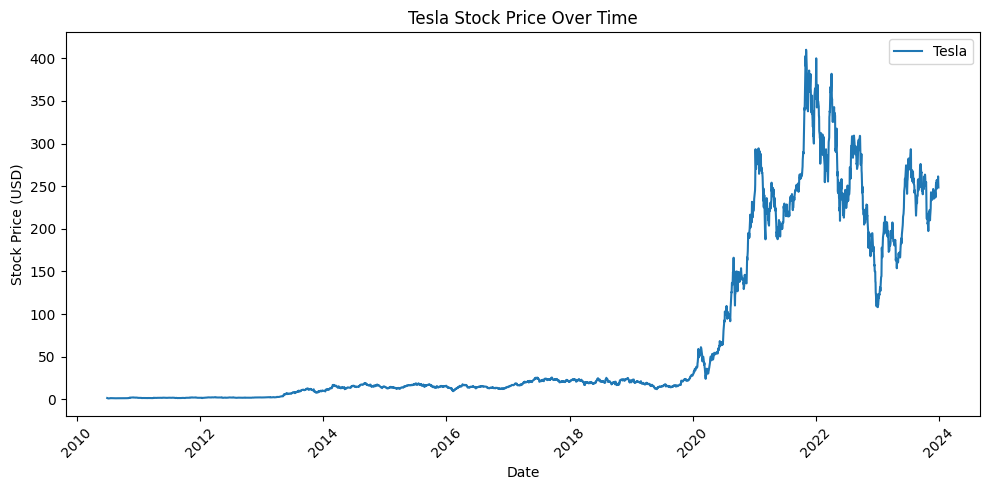

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
def make_graph(data, stock, title):
    plt.figure(figsize=(10, 5))
    plt.plot(data['Date'], data['Close'], label=stock)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

make_graph(tesla_data, stock='Tesla', title='Tesla Stock Price Over Time')

[*********************100%***********************]  1 of 1 completed


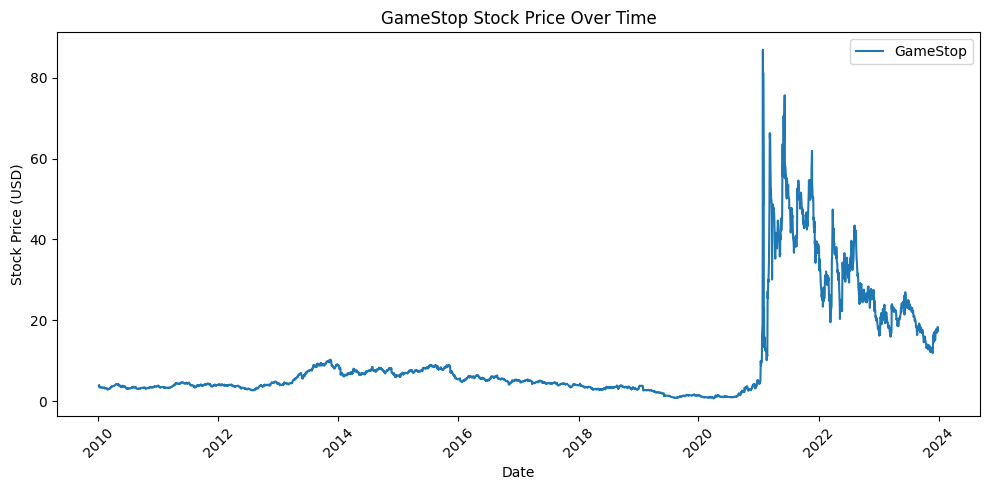

In [19]:
gme_data = yf.download('GME', start='2010-01-01', end='2023-12-31')
gme_data.reset_index(inplace=True)

make_graph(gme_data, stock='GameStop', title='GameStop Stock Price Over Time')